[ -76.61647473 -221.93938183  539.09597534  302.94717052 -537.13133602
  241.84539461   61.29758982  237.01362043  691.11541632   79.10469151] 151.77610217996966


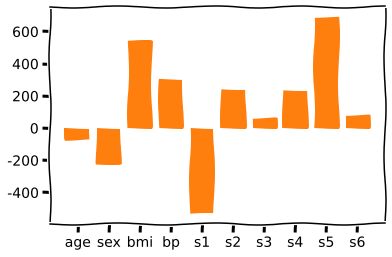

In [9]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as met
diabetes=load_diabetes()
X=diabetes.data
Y=diabetes.target
#show=pd.DataFrame(X, columns=diabetes.feature_names)
#show['answer']=diabetes.target
Xtrain,xtest,Ytrain, ytest=train_test_split(X,Y,test_size=0.3, random_state=12)
model= LinearRegression()
model.fit(Xtrain,Ytrain)
print(model.coef_, model.intercept_)
pred=model.predict(xtest)
met.mean_squared_error( ytest,pred)
plt.scatter(ytest,pred);
plt.bar(diabetes.feature_names,model.coef_);

<BarContainer object of 10 artists>

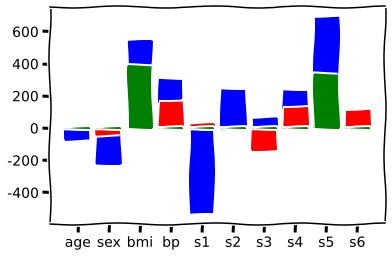

In [10]:
#Lasso for feature selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
model1= LinearRegression()
model1.fit(Xtrain,Ytrain)
plt.bar(diabetes.feature_names,model1.coef_, color='b')

model2= Ridge()
model2.fit(Xtrain,Ytrain)
plt.bar(diabetes.feature_names,model2.coef_, color='r')

model3= Lasso()
model3.fit(Xtrain,Ytrain)
plt.bar(diabetes.feature_names,model3.coef_, color='g')


In [139]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as mlt
diamond= pd.read_csv('diamonds.csv', index_col=0)
df=pd.DataFrame(diamond)
df.cut=df.cut.apply(['Fair','Good','Very Good','Premium','Ideal'].index)
df.color=df.color.apply(['J','I','H','G','F','E','D'].index)
df.clarity=df.clarity.apply(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'].index)
X=df.loc[:,df.columns!='price']
Y=df.price
Xtrain,xtest,Ytrain, ytest=train_test_split(X,Y,test_size=0.3, random_state=12)
model=LinearRegression()
model.fit(Xtrain,Ytrain)
print(model.coef_, model.intercept_)
ypred=model.predict(xtest)
print('modelall',mlt.mean_squared_error(ytest,ypred))
##
col=['cut', 'color','clarity'] #['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
Xtrain_new=Xtrain.loc[:,col]
xtest_new=xtest.loc[:,col]
model.fit(Xtrain_new,Ytrain)
print(model.coef_, model.intercept_)
ypred=model.predict(xtest_new)
print('model1',mlt.mean_squared_error(ytest,ypred))
##
Xtrain_new=Xtrain[col]
xtest_new=xtest[col]
model.fit(Xtrain_new,Ytrain)
print(model.coef_, model.intercept_)
ypred=model.predict(xtest_new)
print('model2',mlt.mean_squared_error(ytest,ypred))
###
Xtrain_new=Xtrain.loc[:,(Xtrain.columns != 'cut' )& (Xtrain.columns != 'color')]
xtest_new=xtest.loc[:,(xtest.columns != 'cut' )& (xtest.columns != 'color')]
model.fit(Xtrain_new,Ytrain)
print(model.coef_, model.intercept_)
ypred=model.predict(xtest_new)
print('model3',mlt.mean_squared_error(ytest,ypred))

[ 1.07649003e+04  1.21261477e+02  3.19508415e+02  5.00698193e+02
 -7.94531181e+01 -2.83772714e+01 -9.00228575e+02  4.26560030e+01
 -1.03110079e+01] 3862.113283454006
modelall 1514105.4229721632
[ -54.09289013 -410.93723362 -358.11276575] 6570.343145167694
model1 15323608.024551058
[ -54.09289013 -410.93723362 -358.11276575] 6570.343145167694
model2 15323608.024551058
[ 1.01813184e+04  4.59245175e+02 -1.31212731e+02 -6.11380868e+01
 -8.12282845e+02  3.35441483e+01 -8.81956561e-01] 10486.902031072743
model3 1808377.4743644027


[[1.98811881]] [-3.74257426]


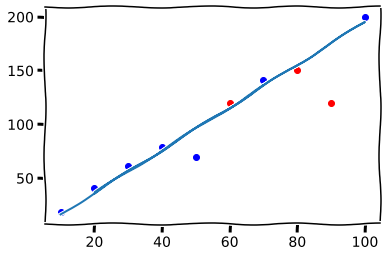

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as met
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = np.array([10, 20 , 30 , 40 ,50 ,60  ,70  ,80  ,90  ,100]).reshape(-1,1)
Y = np.array([18, 41 , 61 , 79 ,70 ,120 ,141 ,150 ,120 ,200]).reshape(-1,1)
Xtrain,xtest, Ytrain, ytest=train_test_split(X,Y,test_size=0.3, random_state=12)
plt.scatter(Xtrain,Ytrain,c='b')
plt.scatter(xtest,ytest,c='r')
model=LinearRegression()
model.fit(Xtrain,Ytrain)
print(model.coef_, model.intercept_)
p=model.predict(xtest)
met.mean_squared_error(ytest,p)
ptred=np.array(Xtrain*model.coef_+model.intercept_)
plt.plot(Xtrain,ptred)

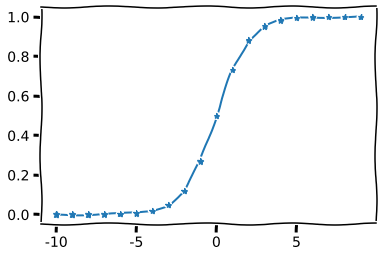

In [12]:
import numpy as np
import matplotlib.pyplot as plt
a=np.arange(-10,10,1)
b=1/(1+np.exp(-a))
plt.xkcd()
plt.plot(a,b, marker='*');

In [13]:
xtrain=np.array([10,12,14,15,30,35,40,65]).reshape(-1,1)
ytrain=xtrain>20
xtest = np.array([8,13,32,36,65]).reshape(-1,1)
##
import numpy as np
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(ypred)
xcal=xtest*model.coef_+model.intercept_
ycal=1/(1+np.exp(-xcal))
print(ycal.reshape(-1,1))

[False False  True  True  True]
[[4.73956629e-04]
 [5.97828131e-03]
 [9.89434024e-01]
 [9.98602581e-01]
 [9.99999999e-01]]


/home/masa1771/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
X=load_iris().data
Y=load_iris().target
###
model=LinearRegression()
model.fit(X,Y)
print(model.score(X,Y))
###
model=LogisticRegression(solver='sag', multi_class='multinomial')
model.fit(X,Y)
print(model.score(X,Y))

0.9303939218549564
0.9866666666666667


/home/masa1771/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/home/masa1771/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


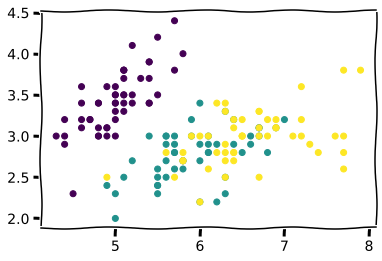

In [15]:
###iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X=load_iris().data
x=X[:,:2]
y=load_iris().target
model=LogisticRegression(solver='sag', multi_class='multinomial')
model.fit(x,y)
plt.scatter(x[:,0], x[:,1], c=y);
##how to make xtest
xmin=x[:,0].min()-0.5
xmax=x[:,0].max()+0.5
xtext1=np.arange(xmin,xmax, 0.2)
xmin=x[:,1].min()-0.5
xmax=x[:,1].max()+0.5
xtext2=np.arange(xmin,xmax, 0.2)
xx1,xx2=np.meshgrid(xtext1,xtext2)
xx1v=xx1.reshape(-1,1)
xx2v=xx2.reshape(-1,1)
xtest=np.c_[xx1v,xx2v]
ypred=model.predict(xtest)

(45, 2)
0.022222222222222223


/home/masa1771/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


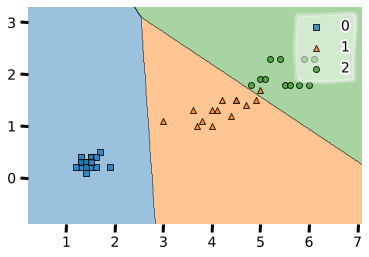

In [17]:
##iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from mlxtend.plotting import decision_regions
from mlxtend.plotting import plot_decision_regions
import sklearn.metrics as mlt
X=load_iris().data[:,[2,3]]
Y=load_iris().target
Xtrain, xtest, Ytrain, ytest=train_test_split(X,Y, test_size=0.3, random_state=12)
model=LogisticRegression(solver='sag', multi_class='multinomial', random_state=12)
model.fit(Xtrain,Ytrain)
ypred=model.predict(xtext)
print(xtest.shape)
print(mlt.mean_squared_error(ytest,ypred))
plot_decision_regions(xtest,ytest, clf=model);

<AxesSubplot:>

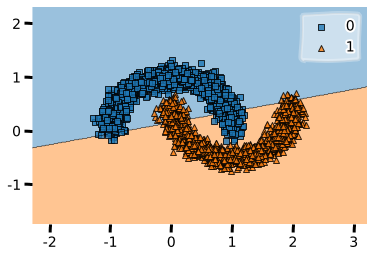

In [18]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
X,Y=make_moons(n_samples=3000, noise=0.1)
model=LogisticRegression()
model.fit(X,Y)
plot_decision_regions(X,Y,model)

<AxesSubplot:>

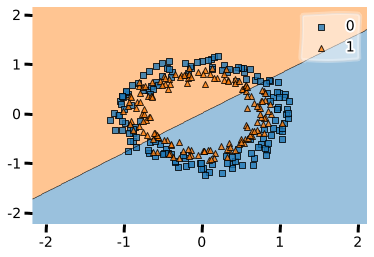

In [19]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from mlxtend.plotting import plot_decision_regions
X,Y=make_circles(n_samples=300, random_state=12, noise=0.1)
model=LogisticRegression(solver='sag', multi_class='multinomial')
model.fit(X,Y);
plot_decision_regions(X,Y,model)